In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Nov  4 10:19:56 2021

@author: carolinephelan
"""
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.

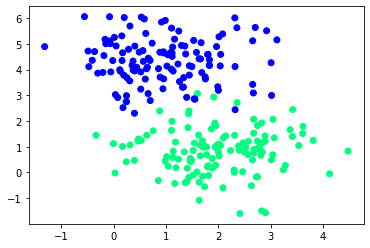

In [2]:
plt.close("all")
# Make the samples
X, y = make_blobs(n_samples=250, centers=2,
                  random_state=0, cluster_std=0.9)
# Assign "false" samples as -1 rather than 0
y[y == 0] = -1
# Change the labels to float64 rather than integer
tmp = np.ones(len(X))
y = tmp * y
plt.figure(1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [3]:
svc = LinearSVC()
svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

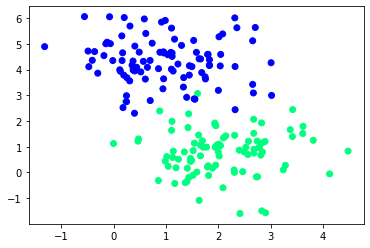

In [4]:
#Plot a scatter graph of the training data only
plt.figure(2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter');
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])

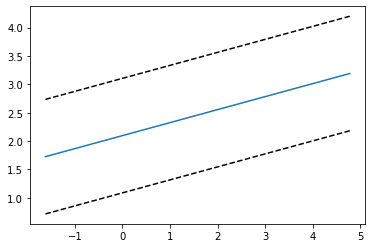

In [5]:
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')

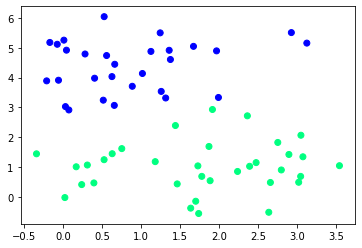

In [6]:
# Plot scatter graph of the test data only
plt.figure(3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='winter');
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])

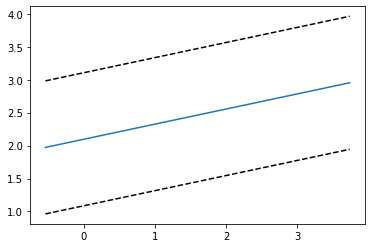

In [7]:
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')

In [8]:
y_pred = svc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[29,  0],
       [ 2, 32]])